In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [ ]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 15978, done.
remote: Counting objects: 100% (147/147), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 15978 (delta 89), reused 118 (delta 76), pack-reused 15831
Receiving objects: 100% (15978/15978), 14.61 MiB | 26.61 MiB/s, done.
Resolving deltas: 100% (10958/10958), done.


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
cd /content/yolov5

/content/yolov5


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="EsJb7Wii8AogvK0PHU06")
project = rf.workspace("sdrproject").project("sdr_project-traffic-signs")
dataset = project.version(3).download("yolov5")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.3 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=e824753f3bbb9ebe63bd1e415658c82fe4aecd2c91e65ee672bd225c7c3a3a82
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
    

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to SDR_Project(traffic-signs)-3 in yolov5pytorch:: 100%|██████████| 1714/1714 [00:00<00:00, 2925.44it/s]


In [ ]:
# Train YOLOv5s on data for 10 epochs
!python '/content/yolov5/train.py' --data '/content/yolov5/SDR_Project(traffic-signs)-3/data.yaml' --weights '/content/yolov5/yolov5m.pt' --img 640 --batch 16 --epochs 10

requirements: YOLOv8 requirement "gitpython" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.2 MB/s eta 0:00:00

requirements: 1 package updated per ['gitpython']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

train: weights=/content/yolov5/yolov5m.pt, cfg=, data=/content/yolov5/SDR_Project(traffic-signs)-3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0]

In [ ]:
!python detect.py --weights '/content/yolov5/runs/train/exp/weights/best.pt' --img 640 --conf 0.1 --source '/content/yolov5/SDR_Project(traffic-signs)-3/test/images/0103_jpg.rf.85c3a3ce4316ecfe940cb8b4dc91a2dc.jpg'

WARNING ⚠️ Ultralytics settings reset to defaults. This is normal and may be due to a recent ultralytics package update, but may have overwritten previous settings. 
View and update settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.yaml'
detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/yolov5/SDR_Project(traffic-signs)-3/test/images/0103_jpg.rf.85c3a3ce4316ecfe940cb8b4dc91a2dc.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20873139 parameters, 0 gradien

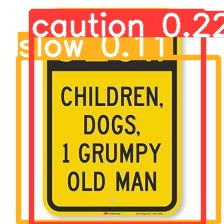

In [ ]:
import glob
from IPython.display import Image, display

i=0
for imageName in glob.glob('runs/detect/exp/*.jpg'):
    i+=1
    if i<5:
        display(Image(filename=imageName))

In [ ]:
!python3 export.py --weights '/content/yolov5/runs/train/exp/weights/best.pt' --include onnx --img-size 640 --batch-size 1 --dynamic


export: data=data/coco128.yaml, weights=['/content/yolov5/runs/train/exp/weights/best.pt'], imgsz=[640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=True, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5 🚀 v7.0-163-g016e046 Python-3.10.11 torch-2.0.0+cu118 CPU

Fusing layers... 
Model summary: 212 layers, 20873139 parameters, 0 gradients, 47.9 GFLOPs

PyTorch: starting from /content/yolov5/runs/train/exp/weights/best.pt with output shape (1, 25200, 11) (40.3 MB)

ONNX: starting export with onnx 1.14.0...
============= Diagnostic Run torch.onnx.export version 2.0.0+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

ONNX: export success ✅ 2.5s, saved as /content/yolov5/runs/train/exp/weights/best.onnx (79.7 MB)

Expor